In [2]:
# import the necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN, KMeans

import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [3]:
# read in from file
df = pd.read_csv("student-por.csv", sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
# split the dataset into training and test set
# x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-3], df.iloc[:,-3:], random_state=1, test_size=0.25)

# x_train.info()

df = df.drop(['G1', 'G2'], axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13


In [5]:
# create combinations of features

x_1 = df.iloc[:,[2,4,13,14,15,16,18,20,24,25,28]] # age, famsize, studytime, failures, schoolsup, famsup, activities, higher, freetime, goout, health
# x_test_2 = x_test.iloc[:,[2,4,13,14,15,16,18,20,24,25,28]]

# impact of how time is spent (studying vs traveling)
x_2 = df.iloc[:,[12,13,18,17,24]] # traveltime, studytime, activities, paid, freetime
# x_test_1 = x_test.iloc[:,[12,13,18,17,24]]

# impact of social environment
x_3 = df.iloc[:,[2,4,15,16,22,23,25]] # age, famsize, schoolsup, famsup, romantic, famrel, goout
# x_test_3 = x_test.iloc[:,[2,4,15,16,22,23,25]]

x_sets = [x_1, x_2, x_3]

x_sets[1].head()

,traveltime,studytime,activities,paid,freetime
0,2,2,no,no,3
1,1,2,no,no,3
2,1,2,no,no,3
3,1,3,yes,no,2
4,1,2,no,no,3


In [6]:
# convert categorical features to binary
mapping_yesno = {'yes': 1, 'no': 0}
mapping_famsize = {'LE3': 0, 'GT3': 1}

# for each set
for i in range(len(x_sets)):
    # for the number of features in the set
    for j in range(len(x_sets[i].columns)):
        col_name = x_sets[i].columns[j]
        if x_sets[i][col_name].dtype == 'object':
            if (x_sets[i][col_name][1] == 'yes' or x_sets[i][col_name][1] == 'no'):
                x_sets[i][col_name] = x_sets[i][col_name].replace(mapping_yesno)
            else:
                x_sets[i][col_name] = x_sets[i][col_name].replace(mapping_famsize)


ipykernel_launcher:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
# scale each pair of training and test sets
x_sets_scaled = x_sets
x_sets_scaled[2].head()

# for i in range(len(x_sets)):
#     scaler = StandardScaler().fit(x_sets[i])
#     x_sets_scaled.append(scaler.transform(x_sets[i]))

,age,famsize,schoolsup,famsup,romantic,famrel,goout
0,18,1,1,0,0,4,4
1,17,1,0,1,0,5,3
2,15,0,1,0,0,4,2
3,15,1,0,1,1,3,2
4,16,1,0,1,0,4,2


In [9]:
# DBSCAN
min_sample = [5,10]
y = df['G3']

for s in range(len(x_sets_scaled)):
    for m in min_sample:
        clustering = DBSCAN(eps = 2, min_samples = m, metric = "euclidean").fit(x_sets_scaled[s])
        clusters = clustering.labels_
        print(clusters)

        print("Using set: {}, min_sample = {}".format(s+1, m))
        # adjusted_rand_index = metrics.adjusted_rand_score(y, clusters)
        # print("Adjusted Random Index: {}".format(adjusted_rand_index))

        # Plot clusters
        df['clusters'] = clusters
        ax = df.plot(kind = 'scatter', x = 'traveltime', y = 'studytime', c = 'clusters', colormap = plt.cm.brg)
        ax.set(title = 'Time data', xlabel = 'travel time', ylabel = 'study time')

        # Plot contingency matrix
        # cont_matrix = metrics.cluster.contingency_matrix(df['G3'], df['clusters'])
        # sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
        # plt.ylabel('Actual')
        # plt.xlabel('Predicted')
        # plt.title('Contingency matrix')
        # plt.tight_layout()

        # Compute adjusted Rand index and silhouette coefficient
        print(metrics.adjusted_rand_score(df['G3'], df['clusters']))
        print(metrics.silhouette_score(x_sets_scaled[s], df['clusters'], metric = "euclidean"))



[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0 -1 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

0.006489896355683377
0.3557454965866571


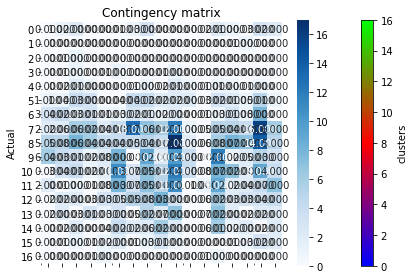

In [80]:
# K-Means

# build model
clustering = KMeans(n_clusters = y.nunique(), init = 'random', n_init = 1, random_state = 2).fit(x_sets_scaled[1])
# store centroids
centroids = clustering.cluster_centers_
# store cluster labels
clusters = clustering.labels_

# Plot clusters
df['clusters'] = clusters
ax = df.plot(kind = 'scatter', x = 'traveltime', y = 'studytime', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Time data', xlabel = 'travel time', ylabel = 'study time')

# Plot contingency matrix
cont_matrix = metrics.cluster.contingency_matrix(df['G3'], df['clusters'])
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()


# Compute adjusted Rand index and silhouette coefficient
print(metrics.adjusted_rand_score(df['G3'], df['clusters']))
print(metrics.silhouette_score(x_sets_scaled[1], df['clusters'], metric = "euclidean"))